In [2]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz


--2025-11-20 21:30:26--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45409631 (43M) [application/x-gzip]
Saving to: ‘reviews_Cell_Phones_and_Accessories_5.json.gz’

reviews_Cell_Phones 100%[===================>]  43.31M  11.4MB/s    in 4.0s    

2025-11-20 21:30:31 (10.8 MB/s) - ‘reviews_Cell_Phones_and_Accessories_5.json.gz’ saved [45409631/45409631]



In [3]:
import gzip
import shutil

with gzip.open("reviews_Cell_Phones_and_Accessories_5.json.gz", "rb") as f_in:
    with open("reviews_Cell_Phones_and_Accessories_5.json", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

Stap 1

In [4]:
import pandas as pd

df = pd.read_json("reviews_Cell_Phones_and_Accessories_5.json", lines=True)

In [9]:
df.reviewText

,reviewText
0,They look good and stick good! I just don't li...
1,These stickers work like the review says they ...
2,These are awesome and make my phone look so st...
3,Item arrived in great time and was in perfect ...
4,"awesome! stays on, and looks great. can be use..."
...,...
194434,Works great just like my original one. I reall...
194435,Great product. Great packaging. High quality a...
194436,"This is a great cable, just as good as the mor..."
194437,I really like it becasue it works well with my...


In [11]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [9]:
text = df.reviewText[0]

print(text)

They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again


Stap 2

In [16]:
def preprocess(text):

  doc = nlp(str(text))

  cleaned = []

  for token in doc:
    if token.is_stop or token.is_punct or token.like_num or token.is_space:
      continue
    cleaned.append(token.lemma_.lower())

  return " ".join(cleaned)

In [17]:
a = preprocess(text)

a

'look good stick good like rounded shape bump siri keep pop irritate will buy product like'

In [19]:
df.shape

(194439, 9)

In [20]:
df["Processed"] = df["reviewText"].map(preprocess)

KeyboardInterrupt: 

In [30]:
reviews = df["reviewText"].head(1000).copy()

In [31]:
reviews

,reviewText
0,They look good and stick good! I just don't li...
1,These stickers work like the review says they ...
2,These are awesome and make my phone look so st...
3,Item arrived in great time and was in perfect ...
4,"awesome! stays on, and looks great. can be use..."
...,...
995,Nice looking case. Very inexpensive and seems...
996,"This is a good, inexpensive case. I use a case..."
997,I searched online for a case for my new Samsun...
998,"I always buy BoxWave cases for my phones, beca..."


In [23]:
reviews = df["reviewText"].sample(1000, random_state=10).copy()

In [32]:
reviews

,reviewText
0,They look good and stick good! I just don't li...
1,These stickers work like the review says they ...
2,These are awesome and make my phone look so st...
3,Item arrived in great time and was in perfect ...
4,"awesome! stays on, and looks great. can be use..."
...,...
995,Nice looking case. Very inexpensive and seems...
996,"This is a good, inexpensive case. I use a case..."
997,I searched online for a case for my new Samsun...
998,"I always buy BoxWave cases for my phones, beca..."


In [33]:
clean = reviews.map(preprocess)

In [34]:
clean

,reviewText
0,look good stick good like rounded shape bump s...
1,sticker work like review say stick great stay ...
2,awesome phone look stylish far year believe ye...
3,item arrive great time perfect condition order...
4,awesome stay look great multiple apple product...
...,...
995,nice look case inexpensive fit excellent value...
996,good inexpensive case use case phone slippery ...
997,search online case new samsung galaxy note ii ...
998,buy boxwave case phone practical comfortable g...


Stap 3

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
#je zorgt ervoor dat deze techniek 5000 unieke woorden gebruikt
tfidf = TfidfVectorizer(max_features=5000)

In [39]:
X_tfidf = tfidf.fit_transform(clean)

In [40]:
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32742 stored elements and shape (1000, 5000)>
  Coords	Values
  (0, 2566)	0.153478687568906
  (0, 1863)	0.24099372568756605
  (0, 4231)	0.2421613719394535
  (0, 2512)	0.2487814727875958
  (0, 3776)	0.36313296388642374
  (0, 3937)	0.2738725666724523
  (0, 547)	0.31795303060902264
  (0, 4019)	0.3358945290016862
  (0, 2386)	0.23063184251372582
  (0, 3332)	0.29385211086427404
  (0, 2313)	0.38475332596578693
  (0, 4931)	0.222412162334103
  (0, 561)	0.12378821728416185
  (0, 3428)	0.15708292230870816
  (1, 4231)	0.28849310895996133
  (1, 2512)	0.14818990320652026
  (1, 4232)	0.4001598445625202
  (1, 4956)	0.11930309630452525
  (1, 3725)	0.23072597623783495
  (1, 3829)	0.22729139256524805
  (1, 1888)	0.1407078155077479
  (1, 4220)	0.2591864437956956
  (1, 3245)	0.11602945602644206
  (1, 4326)	0.3153548044853874
  (1, 4285)	0.3347539672833608
  :	:
  (998, 1661)	0.1477896501074961
  (998, 4663)	0.18939435310141
  (998, 3368)	0.20194

In [41]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 36.7 MB/s eta 0:00:00


In [45]:
from gensim.models import Word2Vec

tokenized = clean.apply(lambda x: x.split())

In [49]:
w2v_model = Word2Vec(
    sentences=tokenized,
    vector_size=300,
    window=5,
    workers=4
)


In [51]:
# Functie om van één document één vector te maken:
# Voor elk woord in het document wordt de woordvector opgehaald.
# Daarna wordt het gemiddelde genomen, zodat één vaste documentvector ontstaat.
# Als een document geen bekende woorden bevat -> geef een nulvector terug.
import numpy as np

def doc_vector(words):
    # Verzamel vectoren van woorden die in het Word2Vec-vocabulaire zitten
    word_vecs = [w2v_model.wv[w] for w in words if w in w2v_model.wv]

    # Geen geldige woorden? -> return een vector van nullen
    if len(word_vecs) == 0:
        return np.zeros(300)

    # Neem het gemiddelde van alle woordvectoren
    return np.mean(word_vecs, axis=0)

# Pas de doc_vector functie toe op alle tokenized documenten
# np.vstack zet alle documentvectoren onder elkaar in één matrix (num_documents x 100)
X_w2v = np.vstack(tokenized.apply(doc_vector))


In [52]:
print(X_w2v)

[[-0.04893238  0.14139497  0.04833679 ... -0.11290018  0.09926589
  -0.04485343]
 [-0.03874437  0.11674011  0.03953209 ... -0.09249881  0.08316557
  -0.03791067]
 [-0.04655585  0.14116411  0.0486629  ... -0.111325    0.09971634
  -0.04643214]
 ...
 [-0.03913064  0.1160432   0.03877893 ... -0.09133286  0.0813912
  -0.03650844]
 [-0.03978129  0.1186863   0.03986228 ... -0.09418483  0.08398807
  -0.03791317]
 [-0.05091732  0.15429215  0.05126097 ... -0.12131157  0.1081799
  -0.04984476]]


In [53]:
X_w2v.shape

(1000, 300)

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #score tussen -1 en 1

k = 3

kmeans = KMeans(n_clusters = k, random_state = 42)

clusters = kmeans.fit_predict(X_tfidf)

print(silhouette_score(X_tfidf, clusters))


0.06581119608735192


PCA = Principle Component Analysis

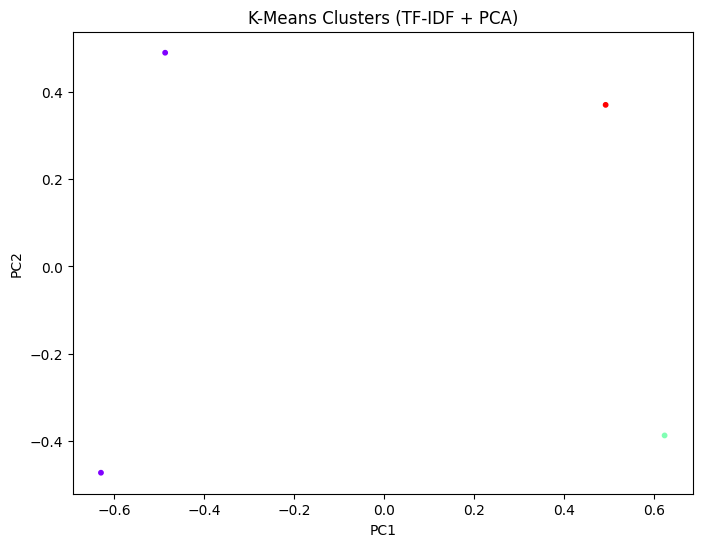

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components = 2)

X_2d = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='rainbow', s=10)
plt.title("K-Means Clusters (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

  De silihoutescore was 0.012, dit ligt dichtbij 0.
  Dwz dat er weinig scheiding is tussen de groepen.
  Dit heeft ook te maken dat het om hetzelfde onderdeel gaat.

  Omdat alle 1000 reviews uit dezelfde categorie komen en sterk op elkaar lijken in taalgebruik


Stap 6:
In deze analyse zijn de tekstreviews eerst opgeschoond met spaCy en vervolgens omgezet naar TF-IDF vectoren. Daarna is K-Means clustering toegepast om te onderzoeken of de reviews automatisch konden worden gegroepeerd op basis van vergelijkbare inhoud.

De kwaliteit van deze clusters is beoordeeld met de Silhouette Score. Deze score was 0.012, wat zeer laag is en aangeeft dat de gevonden clusters nauwelijks van elkaar verschillen. De reviews in deze dataset zijn inhoudelijk sterk homogeen: ze komen allemaal uit dezelfde categorie en gebruiken vaak vergelijkbare woorden. Hierdoor liggen de TF-IDF representaties dicht bij elkaar en ontstaat er geen duidelijke clusterstructuur.

De PCA-visualisatie bevestigt dit. In de 2D-projectie van de data overlappen de clusters bijna volledig en is er geen duidelijke scheiding zichtbaar. Dit toont aan dat K-Means in deze setup geen betekenisvolle groepen kon vormen.

Conclusie: Hoewel clustering een bruikbare techniek is om structuur te ontdekken in ongesuperviseerde tekstdata, laat deze analyse zien dat het minder effectief is voor datasets die inhoudelijk weinig variatie hebben. In dit geval leveren TF-IDF en K-Means geen sterke, interpreteerbare clusters op.



In [74]:
text = [
"I am eating an icecream",
"Walking down the streets",
"saw an icecream running away",
"a dog is eating on the streets"]


X_tfidf = tfidf.fit_transform(text)

In [75]:
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19 stored elements and shape (4, 14)>
  Coords	Values
  (0, 0)	0.5908190806023349
  (0, 5)	0.4658085493691629
  (0, 1)	0.4658085493691629
  (0, 6)	0.4658085493691629
  (1, 13)	0.5552826649411127
  (1, 4)	0.5552826649411127
  (1, 12)	0.43779123108611473
  (1, 11)	0.43779123108611473
  (2, 1)	0.3827427224171519
  (2, 6)	0.3827427224171519
  (2, 10)	0.4854606118156975
  (2, 9)	0.4854606118156975
  (2, 2)	0.4854606118156975
  (3, 5)	0.3574550433419527
  (3, 12)	0.3574550433419527
  (3, 11)	0.3574550433419527
  (3, 3)	0.45338639737285463
  (3, 7)	0.45338639737285463
  (3, 8)	0.45338639737285463
